# Binomial model - Case studies

_Adapted from Josep Fortiana (2023-03-13) by Jordi Abante (2024-03-11)_

# Case study 3: Placenta previa

A classical problem from the book by Andrew Gelman and others, _Bayesian Data Analysis - Third edition_ **(BDA3),** pag. 37.

Placenta previa is a problem in pregnancy where the placenta implants low on the uterus, potentially obstructing the birth canal. An early study concerning the sex of placenta previa births in Germany found that of a total of 980 births, 437 were female. How much evidence does this provide for the claim that the proportion of female births in the population of placenta previa births is less than 0.485, the proportion of female births in the general population?

We know that: 

1. The proportion of female births in this population is 48.5\%. 

2. A study of 980 placenta previa births found that 437 (44.6\%) of them were female. 

How much evidence does this provide for the claim that the proportion of female births in the population of placenta previa
births is is less than 0.485?

## Analysis using a nonconjugate prior distribution 

### _(a) A discrete prior_

In the BDA3 book they consider conjugate (Beta) priors, just as in the previous two Case Studies. Here, instead, we will use their next suggestion, a nonconjugate prior. As a first stage, as a sort of springboard, we take a very simple, discrete prior. To this end we add a fictitious historical proportion (from another state, say) of 45.0%. We assume a priori that both historical figures are equally probable.

### The discrete prior

Thus, our discrete prior is:

$$
	\begin{array}{lcl}
	\theta_{1}=0.485	&\text{ with probability }	&\pi_{1}\equiv P(\theta_{1})=0.5,\\
	\theta_{2}=0.45		&\text{ with probability }	&\pi_{2}\equiv P(\theta_{2})=0.5.
	\end{array}
$$

In [44]:
# Prior information
theta.1<-0.485
theta.2<-0.45
Prior.1<-0.5
Prior.2<-0.5
LogPrior.1<-log(Prior.1)
LogPrior.2<-log(Prior.2)

### Observed data

In [45]:
# Observed data
n<-980
x<-437
theta.obs<-x/n
round(theta.obs,3)

[1] 0.446

### Likelihood

Likelihood is the usual binomial one:

$$
    f(x|\theta)=\theta^{x}\cdot(1-\theta)^{(n-x)}.
$$

In actual computations it may be safer to use its logarithm, _Log-likelihood,_ to avoid products of very large and very small quantities.

In [46]:
Lik<-function(x,theta,n){theta^x*(1-theta)^(n-x)}
LogLik<-function(x,theta,n){x*log(theta)+(n-x)*log(1-theta)}

Note that the log of the unnormalized posterior ($p(\theta|x)\propto p(x|\theta)p(\theta)=p_u(\theta|x)$) can be written as:
$$
\log p_u(\theta|x) = \log (p(x|\theta)\cdot p(\theta))  = \log p(x|\theta) + \log p(\theta)
$$

### Posterior

Likelihood, joint pdf and their logarithms. Bayes formula needs the x marginal in the denominator to give the posterior pdf, but we can circumvent this step by normalizing to one the _non-normalized_ posterior pdf. Observe that, consistently with the data, the posterior probability of 0.45 is much higher than its prior value:

In [47]:
LogPost.1<-LogLik(x,theta.1,n)+LogPrior.1
LogPost.2<-LogLik(x,theta.2,n)+LogPrior.2
Post.1<-exp(LogPost.1)
Post.2<-exp(LogPost.2)
S<-(Post.1+Post.2)
Post.1<-Post.1/S
Post.2<-Post.2/S
round(Post.1,3)
round(Post.2,3)

[1] 0.049

[1] 0.951

Under this prior, the data would support $\theta=\theta_2$ over that of the general population, suggesting that the rate of female births is smaller for placenta previa births. This discrete prior, however, is probably too simple so let's consider other non-conjugate priors.

## Analysis using a nonconjugate prior distribution 

### _(b) A triangular pdf_

In the BDA3 book they consider first conjugate (Beta) priors, just the same procedure as in the two previous Case Studies, which you can follow as a (highly recommended) exercise. Here, instead, we will use their next suggestion,
namely the triangular pdf in the figure:

<div>
<img src="./Placenta.previa.Nonconjugate.prior.jpg" width="400">
</div>

This pdf has the following specifications:

1. It is centered at $m=0.485$ (i.e., $\theta_1$)

2. 40% of the probability mass is outside the interval [m-c,m+c]=[0.385,0.585], c=0.100.

# Exercise 01

From the information above, check that the equation of this pdf is:

$$
    h(t)=\left\{
    \begin{array}{lcl}
         a,        &\text{ for }  &0<t<m-c \quad\text{and } m+c<t<1,\\
         A+b\cdot t/c,  &\text{ for }  &t\in [m-c,c],\\ 
         B-b\cdot t/c   &\text{ for }  &t\in [c,m+c],\\ 
    \end{array}
    \right.\mskip80mu t \in[0,1]
$$

where $a=0.50$, $b=5.00$ is the height of the central triangle ($a+b$ is the peak ordinate), $A=a+b-(b\cdot m)/c$,
$B<-a+b+(b\cdot m)/c$.

Write a function `h()`to compute the pdf $h(t)$, plot it (verify that the integral on $[0,1]$ is indeed equal to 1),
compute its expectation and variance.
_Hint: $a$ is determined by the equation $0.40=p_{tails} = a\cdot(1-2\cdot c)$, then the area of the upper central isosceles triangle is $c\cdot b = 1-a =0.5$._

<div>
<img src="./Placenta.previa.Nonconjugate.prior.1.jpg" width="400">
</div>

In [48]:
# here we define h(t)
m<-0.485
c<-0.100
p.tails<-0.4  
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

### Discretizing the continuous prior

Next we construct a grid of $N$ points $\mathbf{t}=(t_1,\dots,t_{N-1})$ on the $[0,1]$. On each interval $[t_{i},t_{i+1}]$, $1\leq i\leq N-1$, the probability from the prior pdf, the integral of $h(t)$ on it, is approximated by the rectangle area $h(t_i)\cdot\delta$, where $\delta=1/N$. The discrete r.v. defined by both vectors: values $\mathbf{t}$ and probabilities $h(\mathbf{t})\cdot \delta$ is a _discretization_ of the continuous r.v. with pdf $h$, a reasonable approximation by a discrete distribution of the given continuous probability distribution. We proceed with this discrete r.v. as in the example above.

In [49]:
n<-980
x<-437
N<-1000 # number of grid intervals
t<-seq(0,1,length=N)
t<-t[-N]# remove last point (equal to 1: we want N intervals)

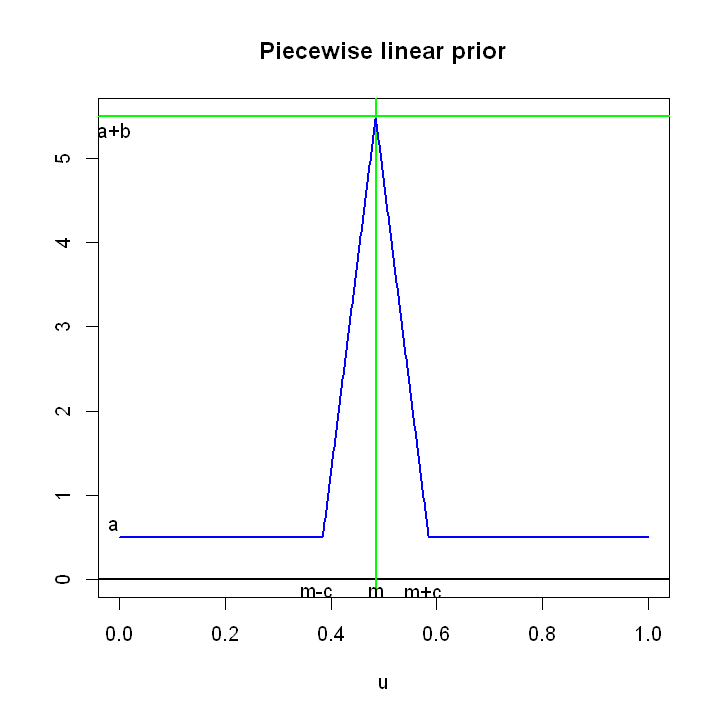

In [50]:
options(repr.plot.width=6,repr.plot.height=6)
u<-seq(0,1,length=N)
plot(u,h(u),"l",lwd=2,col="blue",xlim=c(0,1),ylim=c(0,5.5),ylab="",main="Piecewise linear prior")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(u,h(u),lwd=2,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")

In [51]:
#
# Lik and LogLik are the Bernoulli quantities defined above
# uncomment only one of the following three lines:
# Use plain likelihood or use logs and, in this case there is the alternative
# to use the dbinom() function (which we expect has been thoughtfully and robustly designed)
#
# Uncomment only one of the three statements:
# 1) Plain posterior
# nnpost<-Lik(x,t,n)*h(t)
# 2) Log posterior
log.nnpost<-LogLik(x,t,n)+log(h(t))
# 3) Log posterior using dbinom
# log.nnpost<-dbinom(x,size=n,prob=t,log=TRUE)+log(h(t))
#
nnpost<-exp(log.nnpost)

We can now normalize the PMF using the sum and obtain the CDF by taking the cumulative sum:

In [52]:
#
# NB. We do not bother to write delta=1/N in the probability values h(t)*delta. Furthermore,
# dbinom() is a multiple of Lik (times the combinatorial coefficient). All these constants
# will be taken care of when normalizing.
#
# Then these non normalized values, after normalized to unit sum, will be the pmf of a discretization of
# the posterior distribution.
#
dpost<-nnpost/sum(nnpost) # pmf
ppost<-c(0,cumsum(dpost)) # cdf

From this pmf/cdf for a discretization of the posterior pdf we can obtain any needed posterior quantity: posterior quantiles, in particular the posterior median, a 95% credible interval, the MAP and posterior expectation estimators of $\theta$, etc.

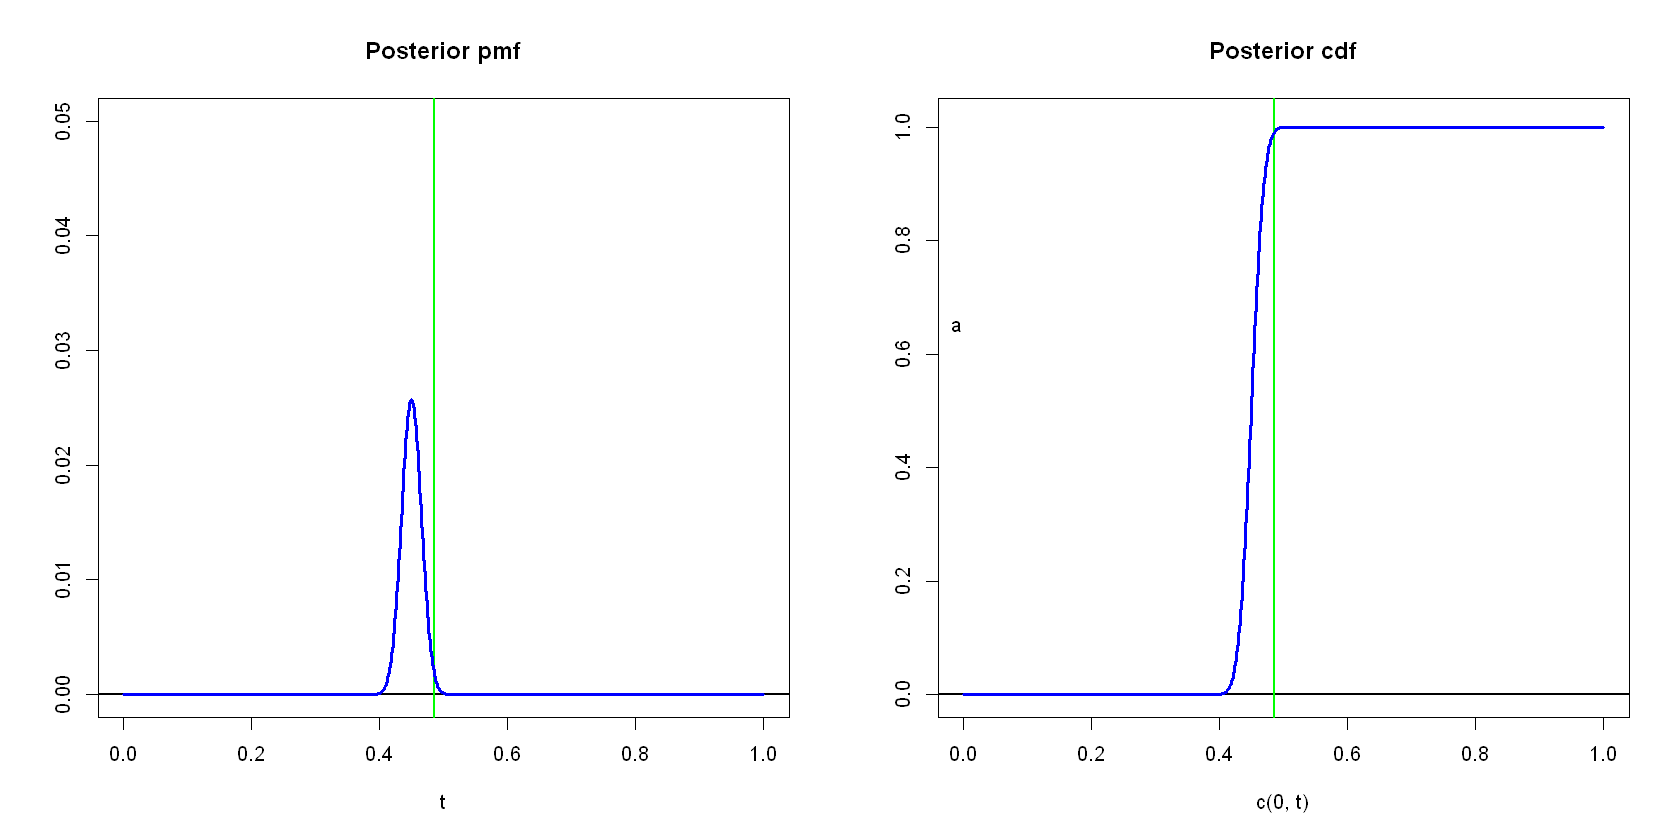

In [53]:
options(repr.plot.width=14,repr.plot.height=7)
old.par<-par(mfrow=c(1,2))
# pmf
plot(t,dpost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,0.05),ylab="",main="Posterior pmf")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(t,dpost,lwd=2.5,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")
# cdf
plot(c(0,t),ppost,"l",lwd=2.5,col="blue",xlim=c(0,1),ylim=c(0,1.01),ylab="",main="Posterior cdf")
abline(h=0,lwd=2,col="black")
abline(v=m,lwd=2,col="green")
abline(h=a+b,lwd=2,col="green")
lines(c(0,t),ppost,lwd=2.5,col="blue")
text(-0.01,a+b-0.15,"a+b")
text(-0.01,a+0.15,"a")
text(m,-0.15,"m")
text(m-c-0.01,-0.15,"m-c")
text(m+c-0.01,-0.15,"m+c")
par(old.par)

# Exercise 02 - Further computations

## 02.01.

Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\textrm{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in BDA3. Do the same for those $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors. 

In [57]:
# define function for computing conjugate beta posterior
compute_conjugate_posterior <- function(alpha, beta, x, n, theta_values) {
  alpha_post <- alpha + x
  beta_post <- beta + n - x
  return(dbeta(theta_values, alpha_post, beta_post))
}

# define function for computing nonconjugate piecewise linear posterior
compute_nonconjugate_posterior <- function(x, n, theta_values) {
  log.nnpost <- LogLik(x, theta_values, n) + log(h(theta_values))
  nnpost <- exp(log.nnpost)
  dpost <- nnpost / sum(nnpost)
  return(approx(c(0, theta_values), c(0, cumsum(dpost)), theta_values, method = "linear")$y)
}

# define function for computing posterior distributions and quantities
compute_posterior_quantities <- function(alpha, beta, x, n, theta_values) {
  posterior_pdf_conjugate <- matrix(NA, nrow = length(alpha), ncol = length(theta_values))
  credible_intervals_conjugate <- matrix(NA, nrow = length(alpha), ncol = 2)
  MAP_conjugate <- vector("numeric", length(alpha))
  posterior_expectation_conjugate <- vector("numeric", length(alpha))
  
  posterior_pdf_nonconjugate <- matrix(NA, nrow = length(alpha), ncol = length(theta_values))
  credible_intervals_nonconjugate <- matrix(NA, nrow = length(alpha), ncol = 2)
  MAP_nonconjugate <- vector("numeric", length(alpha))
  posterior_expectation_nonconjugate <- vector("numeric", length(alpha))
  
  for (i in 1:length(alpha)) {
    # compute posterior pdf, map, and posterior expectation for conjugate prior
    posterior_pdf_conjugate[i,] <- compute_conjugate_posterior(alpha[i], beta[i], x, n, theta_values)
    MAP_conjugate[i] <- theta_values[which.max(posterior_pdf_conjugate[i,])]
    posterior_expectation_conjugate[i] <- sum(theta_values * posterior_pdf_conjugate[i,])
    # compute credible interval for conjugate prior
    credible_intervals_conjugate[i,] <- quantile(theta_values, c(0.025, 0.975), 
                                                  probs = c(0.025, 0.975),
                                                  na.rm = TRUE)
    
    # compute posterior pdf, map, and posterior expectation for nonconjugate prior
    posterior_pdf_nonconjugate[i,] <- compute_nonconjugate_posterior(x, n, theta_values)
    MAP_nonconjugate[i] <- theta_values[which.max(posterior_pdf_nonconjugate[i,])]
    posterior_expectation_nonconjugate[i] <- sum(theta_values * posterior_pdf_nonconjugate[i,])
    # compute credible interval for nonconjugate prior
    credible_intervals_nonconjugate[i,] <- quantile(theta_values, c(0.025, 0.975), 
                                                      probs = c(0.025, 0.975),
                                                      na.rm = TRUE)
  }
  
  # create dataframes for tables
  table_conjugate <- data.frame(
    Alpha = alpha,
    Beta = beta,
    "95% CI Lower" = credible_intervals_conjugate[,1],
    "95% CI Upper" = credible_intervals_conjugate[,2],
    MAP = MAP_conjugate,
    "Posterior Expectation" = posterior_expectation_conjugate
  )
  
  table_nonconjugate <- data.frame(
    Alpha = alpha,
    Beta = beta,
    "95% CI Lower" = credible_intervals_nonconjugate[,1],
    "95% CI Upper" = credible_intervals_nonconjugate[,2],
    MAP = MAP_nonconjugate,
    "Posterior Expectation" = posterior_expectation_nonconjugate
  )
  
  return(list(table_conjugate = table_conjugate, table_nonconjugate = table_nonconjugate))
}

# usage example:
# define theta values
theta_values <- seq(0, 1, length.out = 1000)
# define prior shape and rate parameters
alpha <- c(1, 2, 4, 8, 16, 32)
beta <- c(1, 2, 4, 8, 16, 32)
# observed data
x <- 437
n <- 980

# compute posterior distributions and quantities
posterior_quantities <- compute_posterior_quantities(alpha, beta, x, n, theta_values)

# print tables
print("Conjugate Prior:")
print(posterior_quantities$table_conjugate)
print("Nonconjugate Prior:")
print(posterior_quantities$table_nonconjugate)

# define function for computing prior predictive pmf
compute_prior_predictive_pmf <- function(alpha, beta, n, theta_values) {
  return(dbeta(theta_values, alpha, beta))
}

# compute prior predictive pmf for conjugate beta prior
prior_predictive_pmf_conjugate <- compute_prior_predictive_pmf(alpha, beta, n, theta_values)

# summarize prior predictive pmf for different parameter values
print("Prior Predictive PMF (Conjugate Prior):")
prior_predictive_summary_conjugate <- data.frame(
  Alpha = alpha,
  Beta = beta,
  "95% CI Lower" = quantile(prior_predictive_pmf_conjugate, 0.025),
  "95% CI Upper" = quantile(prior_predictive_pmf_conjugate, 0.975),
  "Posterior Expectation" = mean(prior_predictive_pmf_conjugate)
)
print(prior_predictive_summary_conjugate)

# define function for computing posterior predictive pmf
compute_posterior_predictive_pmf <- function(alpha, beta, x, n, theta_values) {
  posterior_pdf_conjugate <- compute_conjugate_posterior(alpha, beta, x, n, theta_values)
  return(posterior_pdf_conjugate)
}

# compute posterior predictive pmf for conjugate beta prior
posterior_predictive_pmf_conjugate <- compute_posterior_predictive_pmf(alpha, beta, x, n, theta_values)

# summarize posterior predictive pmf for different parameter values
print("Posterior Predictive PMF (Conjugate Prior):")
posterior_predictive_summary_conjugate <- data.frame(
  Alpha = alpha,
  Beta = beta,
  "95% CI Lower" = quantile(posterior_predictive_pmf_conjugate, 0.025),
  "95% CI Upper" = quantile(posterior_predictive_pmf_conjugate, 0.975),
  "Posterior Expectation" = mean(posterior_predictive_pmf_conjugate)
)
print(posterior_predictive_summary_conjugate)

Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"

[1] "Conjugate Prior:"
  Alpha Beta X95..CI.Lower X95..CI.Upper       MAP Posterior.Expectation
1     1    1         0.025         0.975 0.4454454              445.5825
2     2    2         0.025         0.975 0.4464464              445.6921
3     4    4         0.025         0.975 0.4464464              445.9099
4     8    8         0.025         0.975 0.4464464              446.3404
5    16   16         0.025         0.975 0.4474474              447.1808
6    32   32         0.025         0.975 0.4494494              448.7845
[1] "Nonconjugate Prior:"
  Alpha Beta X95..CI.Lower X95..CI.Upper       MAP Posterior.Expectation
1     1    1         0.025         0.975 0.5755756              399.1732
2     2    2         0.025         0.975 0.5755756              399.1732
3     4    4         0.025         0.975 0.5755756              399.1732
4     8    8         0.025         0.975 0.5755756              399.1732
5    16   16         0.025         0.975 0.5755756              399.1732
6 

Warning message in data.frame(Alpha = alpha, Beta = beta, `95% CI Lower` = quantile(prior_predictive_pmf_conjugate, :
"row names were found from a short variable and have been discarded"

  Alpha Beta X95..CI.Lower X95..CI.Upper Posterior.Expectation
1     1    1  3.723324e-19      4.355818             0.9995005
2     2    2  3.723324e-19      4.355818             0.9995005
3     4    4  3.723324e-19      4.355818             0.9995005
4     8    8  3.723324e-19      4.355818             0.9995005
5    16   16  3.723324e-19      4.355818             0.9995005
6    32   32  3.723324e-19      4.355818             0.9995005
[1] "Posterior Predictive PMF (Conjugate Prior):"


Warning message in data.frame(Alpha = alpha, Beta = beta, `95% CI Lower` = quantile(posterior_predictive_pmf_conjugate, :
"row names were found from a short variable and have been discarded"

  Alpha Beta X95..CI.Lower X95..CI.Upper Posterior.Expectation
1     1    1             0      18.75013                 0.999
2     2    2             0      18.75013                 0.999
3     4    4             0      18.75013                 0.999
4     8    8             0      18.75013                 0.999
5    16   16             0      18.75013                 0.999
6    32   32             0      18.75013                 0.999


## 02.02.

Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. 

Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$. 

[1] "Prior Predictive PMF (Inverse Transformation Method):"
$Empirical_PMF
sample_inverse
2.77361134067178e-06   0.0001109001878649 0.000203686645254493 
               1e-04                1e-04                1e-04 
0.000274358063470572 0.000398514040280133 0.000520110281649977 
               1e-04                1e-04                1e-04 
0.000585094678681344 0.000674143163487315 0.000762482492718846 
               1e-04                1e-04                1e-04 
0.000771949267946184  0.00090466050663963  0.00117698076413944 
               1e-04                1e-04                1e-04 
 0.00123567919712514  0.00126043437281623  0.00127888709772378 
               1e-04                1e-04                1e-04 
 0.00149992976104841  0.00155327045591548  0.00163537802407518 
               1e-04                1e-04                1e-04 
 0.00165833027334884  0.00166242553386837  0.00189689156366512 
               1e-04                1e-04                1e-04 
 0.00192545811

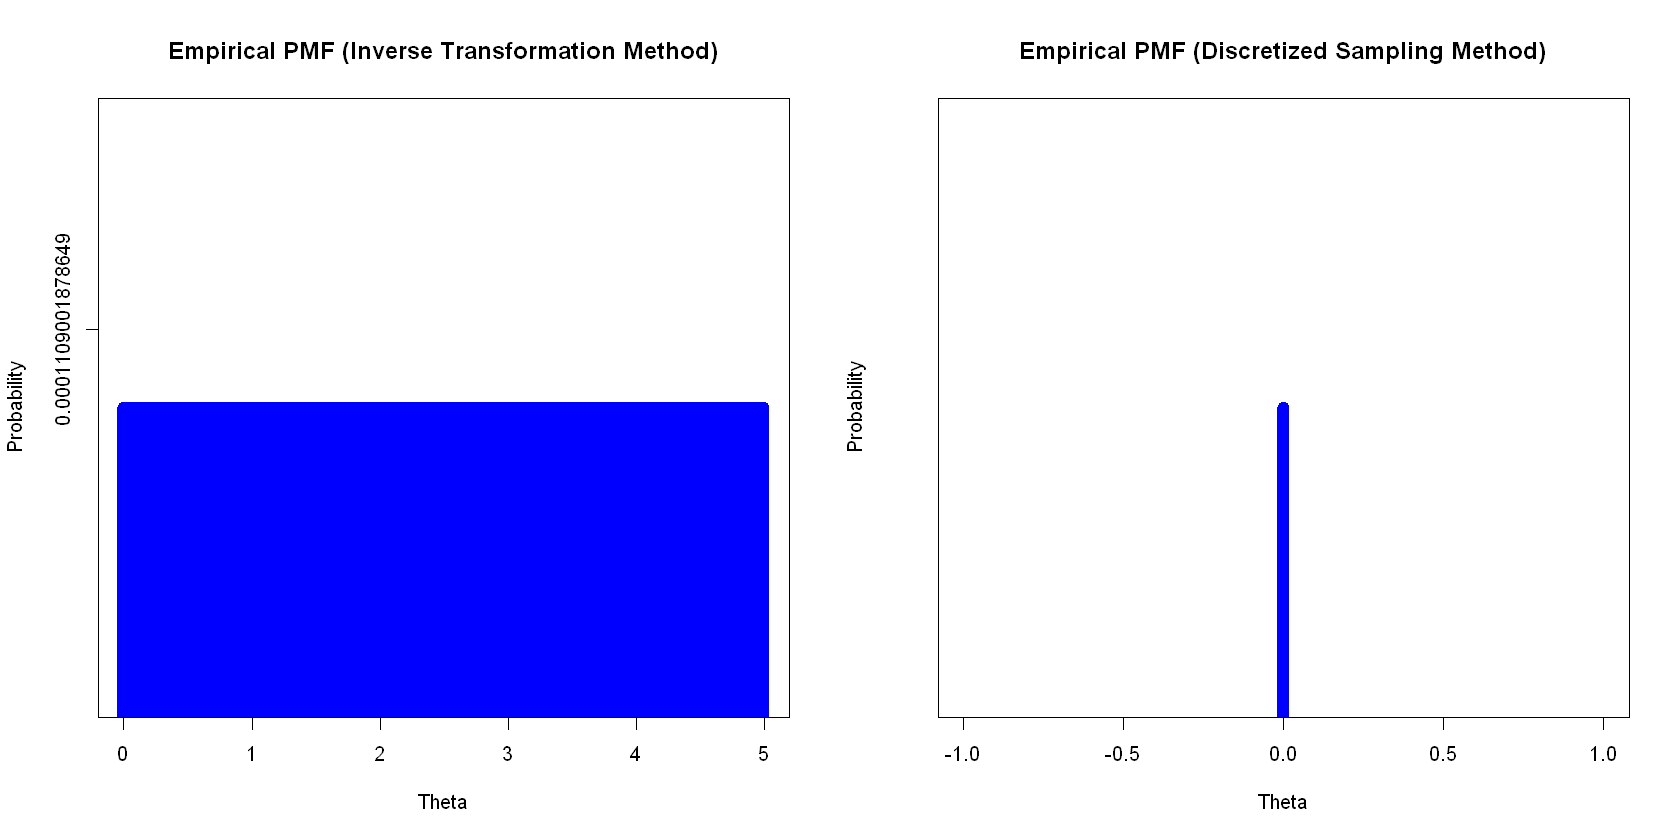

In [58]:
# function to sample from the discretized piecewise linear pdf h
sample_from_h_discretized <- function(n, t_values, dpost) {
  cdf <- cumsum(dpost)  # compute the cumulative distribution function
  u <- runif(n)  # generate n uniform random numbers
  sample_values <- t_values[findInterval(u, cdf) + 1]  # sample from t_values based on the cumulative probabilities
  return(sample_values)
}

# data
total_births <- 980

# prior parameters
alpha_prior <- 1
beta_prior <- 1

# generate theta values
theta <- seq(0, 1, by = 0.001)

# compute nonconjugate prior pdf
prior_pdf_nonconjugate <- dbeta(theta, alpha_prior, beta_prior)

# simulate samples from both methods
n_samples <- 10000
sample_inverse <- sample_from_h_inverse(n_samples)
sample_discretized <- sample_from_h_discretized(n_samples, theta, prior_pdf_nonconjugate)

# summary of the simulated samples
summary_inverse <- list(
  Empirical_PMF = table(sample_inverse) / n_samples,
  Median = median(sample_inverse),
  Mode = theta[which.max(density(sample_inverse)$x)],
  Expectation = mean(sample_inverse),
  Standard_Deviation = sd(sample_inverse)
)

summary_discretized <- list(
  Empirical_PMF = table(sample_discretized) / n_samples,
  Median = median(sample_discretized),
  Mode = theta[which.max(density(sample_discretized)$x)],
  Expectation = mean(sample_discretized),
  Standard_Deviation = sd(sample_discretized)
)

# plot empirical pmf
par(mfrow = c(1, 2))
plot(names(summary_inverse$Empirical_PMF), summary_inverse$Empirical_PMF, type = "h", lwd = 10, col = "blue", xlab = "Theta", ylab = "Probability", main = "Empirical PMF (Inverse Transformation Method)")
plot(names(summary_discretized$Empirical_PMF), summary_discretized$Empirical_PMF, type = "h", lwd = 10, col = "blue", xlab = "Theta", ylab = "Probability", main = "Empirical PMF (Discretized Sampling Method)")

# print summaries
print("Prior Predictive PMF (Inverse Transformation Method):")
print(summary_inverse)
print("Prior Predictive PMF (Discretized Sampling Method):")
print(summary_discretized)

## 02.03.

Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 1.

Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.

[1] "Posterior Predictive PMF (Discretized Sampling Method):"
$Empirical_PMF
sample_posterior_predictive_discretized
 0.368  0.369   0.37  0.371  0.372  0.373  0.374  0.375  0.376  0.377  0.378 
0.0001 0.0002 0.0002 0.0004 0.0008 0.0005 0.0008 0.0016 0.0018 0.0025 0.0034 
 0.379   0.38  0.381  0.382  0.383  0.384  0.385  0.386  0.387  0.388  0.389 
0.0037 0.0067 0.0044 0.0073 0.0096 0.0153 0.0158 0.0204 0.0274 0.0385 0.0460 
  0.39  0.391  0.392  0.393  0.394  0.395  0.396 
0.0517 0.0689 0.0840 0.1070 0.1385 0.1590 0.1835 

$Median
[1] 0.393

$Mode
[1] 0.511

$Expectation
[1] 0.3921012

$Standard_Deviation
[1] 0.004059114



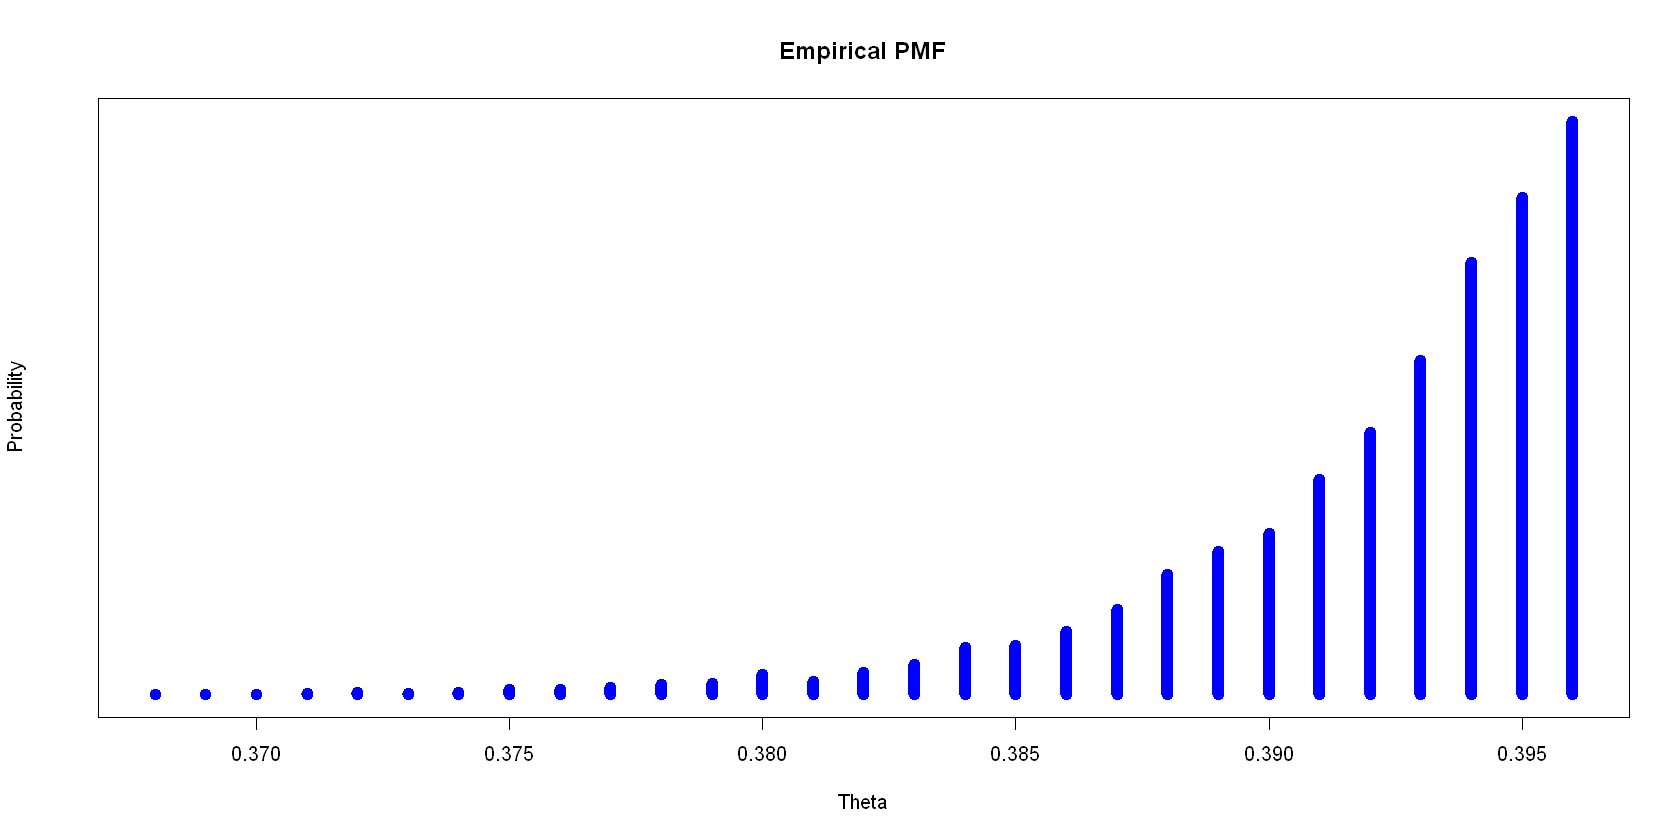

In [59]:
# function to sample from the posterior predictive pmf using the nonconjugate piecewise linear pdf
sample_posterior_predictive_discretized <- function(n, t_values, posterior_pdf) {
  cdf <- cumsum(posterior_pdf)  # compute the cumulative distribution function
  sorted_indices <- order(t_values)  # sort indices based on theta values
  sorted_cdf <- cdf[sorted_indices]  # sort cdf values based on sorted theta values
  sorted_theta <- t_values[sorted_indices]  # sort theta values accordingly
  u <- runif(n)  # generate n uniform random numbers
  sample_values <- sorted_theta[findInterval(u, sorted_cdf)]  # sample from sorted theta values based on the sorted cumulative probabilities
  return(sample_values)
}

# data
female_births <- 437
total_births <- 980

# posterior pdf parameters
alpha_posterior <- female_births + 1
beta_posterior <- total_births - female_births + 1

# generate theta values
theta <- seq(0, 1, by = 0.001)

# compute nonconjugate posterior pdf
posterior_pdf_nonconjugate <- dbeta(theta, alpha_posterior, beta_posterior)

# simulate samples from the posterior predictive pmf
n_samples_posterior <- 10000
sample_posterior_predictive_discretized <- sample_posterior_predictive_discretized(n_samples_posterior, theta, posterior_pdf_nonconjugate)

# summary of the simulated samples
summary_posterior_predictive_discretized <- list(
  Empirical_PMF = table(sample_posterior_predictive_discretized) / n_samples_posterior,
  Median = median(sample_posterior_predictive_discretized),
  Mode = theta[which.max(density(sample_posterior_predictive_discretized)$x)],
  Expectation = mean(sample_posterior_predictive_discretized),
  Standard_Deviation = sd(sample_posterior_predictive_discretized)
)

# plot empirical pmf
plot(names(summary_posterior_predictive_discretized$Empirical_PMF), summary_posterior_predictive_discretized$Empirical_PMF, type = "h", lwd = 10, col = "blue", xlab = "Theta", ylab = "Probability", main = "Empirical PMF")

# print summary
print("Posterior Predictive PMF (Discretized Sampling Method):")
print(summary_posterior_predictive_discretized)